In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Set font size when plotting
plt.rcParams.update({'font.size': 16})

### Read-in benchmark test files (.txt) and extract runtimes to create an average based on 20 runtimes for each benchmark across the five different compiler optimisations

In [2]:
cwd = os.getcwd()

In [3]:
os.chdir(cwd)

# Will store average runtime in tests that change N=100 to N=1000 in increments of 25
change_N = []
# Will store average runtime in tests that change M=10000 to M=100000 in increments of 2500
change_M = []

folder = "Tests\Flags"
os.chdir(folder)
for sub_folder in ["O0", "O1", "O2", "O3", "O3_ffast_math"]:
    try:
        os.chdir(sub_folder)
    except:
        os.chdir("..\\" + sub_folder)
    
    # Temporary lists to calculate average runtime
    temp_N = []
    temp_M = []
    for file_name in os.listdir():
        # Test that changed N only
        if "M10000." in file_name:
            file = open(file_name, "r")
            temp = []
            for line in file.readlines():
                if "Total runtime" in line:
                    temp.append(float(line.split(" ")[-1].rstrip("\n")))
            runtime = sum(temp)/len(temp)
            temp_N.append(runtime)
            file.close()
        
        # Test that changed M only
        if "N100_" in file_name:
            file = open(file_name, "r")
            temp = []
            for line in file.readlines():
                if "Total runtime" in line:
                    temp.append(float(line.split(" ")[-1].rstrip("\n")))
            runtime = sum(temp)/len(temp)
            temp_M.append(runtime)
            file.close()
    
    # Modifies lists so runtime based on increasing N and M in ascending order
    # (Because e.g. N1000_ file appeared before N100_ on my Windows PC)
    temp_N = temp_N[1:] + [temp_N[0]]
    temp_M = [temp_M[0]] + temp_M[2:] + [temp_M[1]]
    
    change_N.append(temp_N)
    change_M.append(temp_M)

change_N = np.array(change_N)
change_M = np.array(change_M)

In [4]:
os.chdir(cwd)

# 37 averages recorded for each of the 5 compiler optimisations
print(change_N.shape)
print(change_M.shape)

(5, 37)
(5, 37)


In [5]:
# Create linearly-spaced arrays based on same increments used in tests
# for plotting on x-axis in graphs
N = np.linspace(100, 1000, change_N.shape[1])
M = np.linspace(10000, 100000, change_M.shape[1])

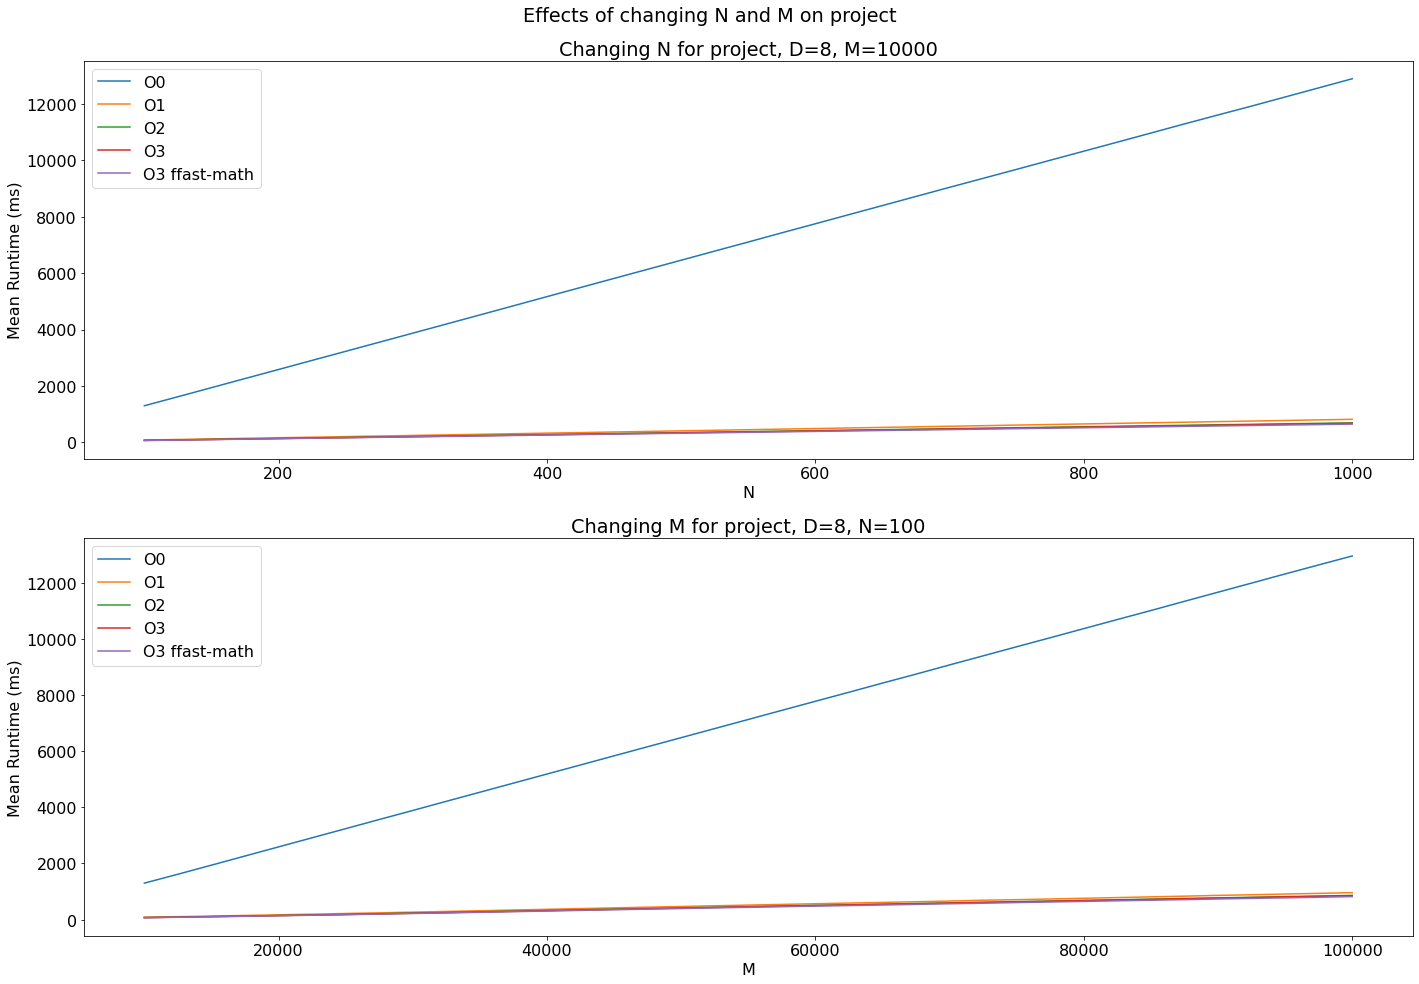

In [6]:
# Plot raw performance results (-O0 included, no scale set on y-axis)
fig, axes = plt.subplots(2, 1, figsize=(20, 14))

axes[0].plot(N, change_N[0, :], label="O0")
axes[0].plot(N, change_N[1, :], label="O1")
axes[0].plot(N, change_N[2, :], label="O2")
axes[0].plot(N, change_N[3, :], label="O3")
axes[0].plot(N, change_N[4, :], label="O3 ffast-math")
# axes[0].set_yscale("log")
axes[0].set_xlabel("N")
axes[0].set_ylabel("Mean Runtime (ms)")
axes[0].set_title("Changing N for project, D=8, M=10000")
axes[0].legend()

axes[1].plot(M, change_M[0, :], label="O0")
axes[1].plot(M, change_M[1, :], label="O1")
axes[1].plot(M, change_M[2, :], label="O2")
axes[1].plot(M, change_M[3, :], label="O3")
axes[1].plot(M, change_M[4, :], label="O3 ffast-math")
# axes[1].set_yscale("log")
axes[1].set_xlabel("M")
axes[1].set_ylabel("Mean Runtime (ms)")
axes[1].set_title("Changing M for project, D=8, N=100")
axes[1].legend()

# Title for whole subplot
fig.suptitle("Effects of changing N and M on project")

fig.tight_layout()
fig.savefig("results_with_O0.png", facecolor="w")

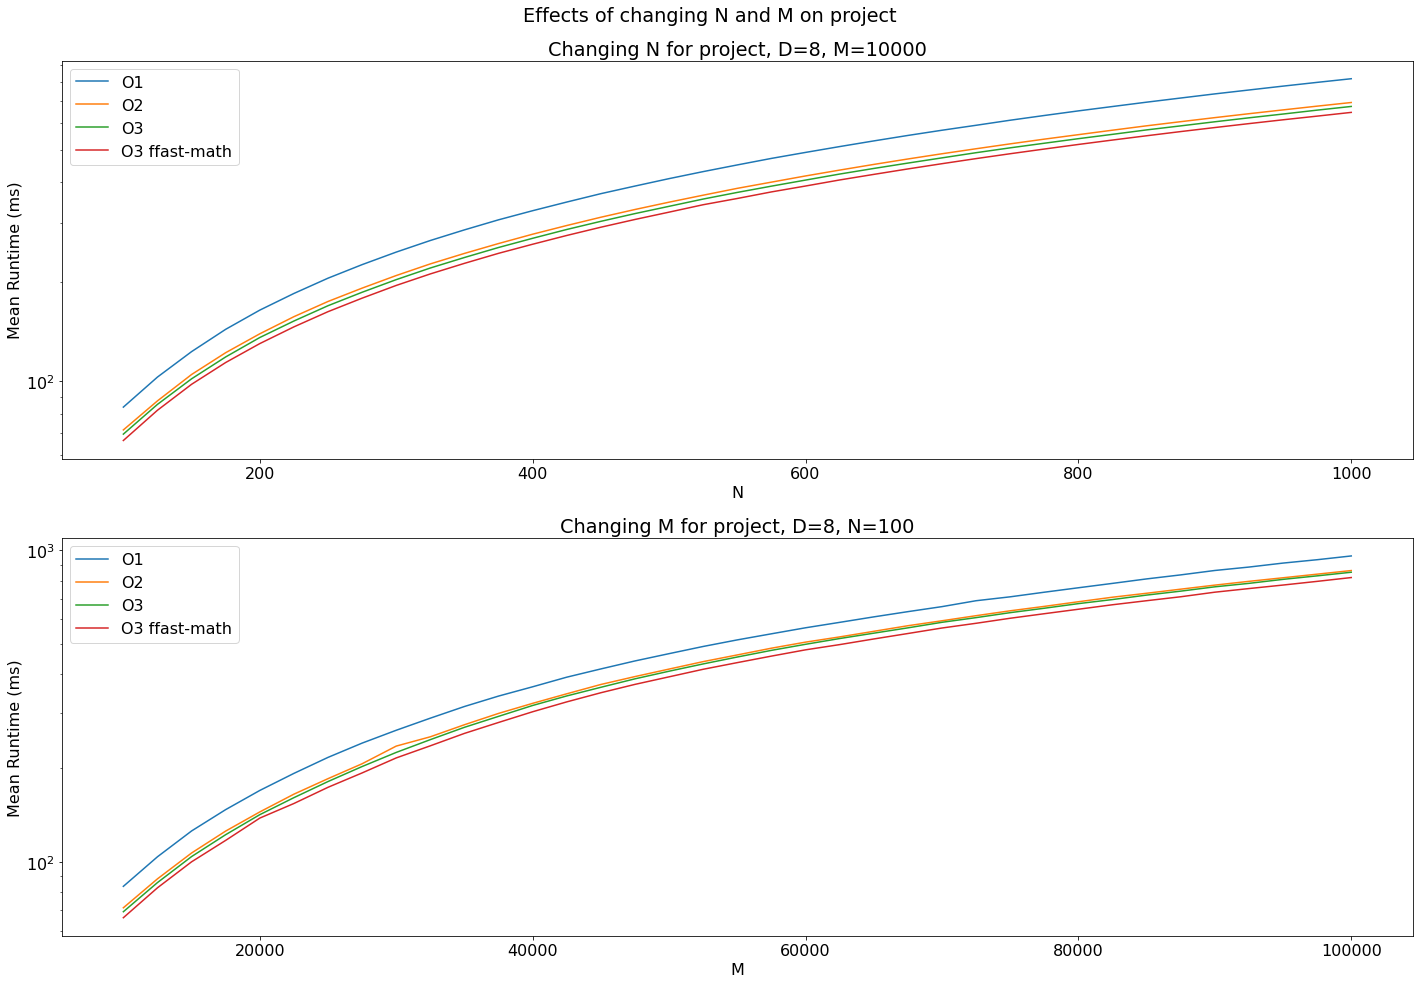

In [7]:
# Plot log-scaled y-axis performance results and don't include -O0 for clearer graph
fig, axes = plt.subplots(2, 1, figsize=(20, 14))

axes[0].plot(N, change_N[1, :], label="O1")
axes[0].plot(N, change_N[2, :], label="O2")
axes[0].plot(N, change_N[3, :], label="O3")
axes[0].plot(N, change_N[4, :], label="O3 ffast-math")
axes[0].set_yscale("log")
axes[0].set_xlabel("N")
axes[0].set_ylabel("Mean Runtime (ms)")
axes[0].set_title("Changing N for project, D=8, M=10000")
axes[0].legend()

axes[1].plot(M, change_M[1, :], label="O1")
axes[1].plot(M, change_M[2, :], label="O2")
axes[1].plot(M, change_M[3, :], label="O3")
axes[1].plot(M, change_M[4, :], label="O3 ffast-math")
axes[1].set_yscale("log")
axes[1].set_xlabel("M")
axes[1].set_ylabel("Mean Runtime (ms)")
axes[1].set_title("Changing M for project, D=8, N=100")
axes[1].legend()

# Title for whole subplot
fig.suptitle("Effects of changing N and M on project")

fig.tight_layout()
fig.savefig("results_without_O0.png", facecolor="w")